In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#TelecomChurnData
#Datasets - customers,internet,churn
#define a model to predict whether a customer will churn or not
#target attribute is churn - yes or no - binary
#classification? or regression?
#Logistic regression

In [ ]:
import pandas as pd
import numpy as np
customers=pd.read_csv("/content/drive/MyDrive/PGP Datasets/customer_data.csv")

In [ ]:
customers.head()
#CustomerID 	The unique ID of each customer
#Gender 	The gender of a person
#SeniorCitizen	Whether a customer can be classified as a senior citizen.
#Partner 	If a customer is married/ in a live-in relationship.
#Dependents	If a customer has dependents (children/ retired parents)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
internet=pd.read_csv("/content/drive/MyDrive/PGP Datasets/internet_data.csv")

In [ ]:
internet.head()
#Tenure	The time for which a customer has been using the service.
#PhoneService  	Whether a customer has a landline phone service along with the internet service.
#MultipleLines	Whether a customer has multiple lines of internet connectivity.
#InternetService 	The type of internet services chosen by the customer.
#OnlineSecurity 	Specifies if a customer has online security.
#OnlineBackup 	Specifies if a customer has online backup.
#DeviceProtection 	Specifies if a customer has opted for device protection
#TechSupport Whether a customer has opted for tech support or not
#StreamingTV Whether a customer has an option of TV Streaming
#StreamingMovies Whether a customer has an option of movie streaming

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [ ]:
churn=pd.read_csv("/content/drive/MyDrive/PGP Datasets/churn_data.csv")

In [ ]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#merge datasets
intermed=pd.merge(customers,churn,how="inner",on="customerID")
telecom=pd.merge(intermed,internet,how="inner",on="customerID")

In [ ]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,...,29.85,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,One year,No,Mailed check,...,1889.5,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,...,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),...,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,...,151.65,Yes,No,Fiber optic,No,No,No,No,No,No


In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   Contract          7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  Churn             7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [ ]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
telecom['PhoneService'].head()

0     No
1    Yes
2    Yes
3     No
4    Yes
Name: PhoneService, dtype: object

In [ ]:
def binary_map(x):
  return x.map({'Yes':1,'No':0})

In [ ]:
telecom.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
telecom.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
telecom.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
telecom.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
telecom.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
telecom.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
varlist=['PhoneService','PaperlessBilling','Dependents','Partner','Churn']
telecom[varlist]=telecom[varlist].apply(binary_map)
telecom[varlist].head()

,PhoneService,PaperlessBilling,Dependents,Partner,Churn
0,0,1,0,1,0
1,1,0,0,0,0
2,1,1,0,0,1
3,0,0,0,0,0
4,1,1,0,0,1


In [ ]:
telecom.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
#This requires one hot encoding
#100
#010
#001
#10000
#01000

In [ ]:
contract_dummy=pd.get_dummies(telecom['Contract'])

In [ ]:
contract_dummy.head()

,Month-to-month,One year,Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [ ]:
telecom.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
telecom.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
telecom.gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
telecom_dummy=pd.get_dummies(telecom[['Contract','PaymentMethod','InternetService','gender']])

In [ ]:
telecom_dummy

,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,gender_Female,gender_Male
0,1,0,0,0,0,1,0,1,0,0,1,0
1,0,1,0,0,0,0,1,1,0,0,0,1
2,1,0,0,0,0,0,1,1,0,0,0,1
3,0,1,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,0,1,1,0,0,0,1
7039,0,1,0,0,1,0,0,0,1,0,1,0
7040,1,0,0,0,0,1,0,1,0,0,1,0
7041,1,0,0,0,0,0,1,0,1,0,0,1


In [ ]:
telecom=pd.concat([telecom,telecom_dummy],axis=1)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   object 
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   Contract                                 7043 non-null   object 
 8   PaperlessBilling                         7043 non-null   int64  
 9   PaymentMethod                            7043 non-null   object 
 10  MonthlyCharges                           7043 no

In [ ]:
telecom=telecom.drop(['Contract','PaymentMethod','InternetService','gender'],axis=1)

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   object 
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines                            7043 no

In [ ]:
telecom_dummy=pd.get_dummies(telecom[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']])
telecom_dummy

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
3,0,1,0,0,0,1,1,0,0,0,...,1,0,0,1,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
7039,0,0,1,1,0,0,0,0,1,0,...,1,1,0,0,0,0,1,0,0,1
7040,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
7041,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
telecom=pd.concat([telecom,telecom_dummy],axis=1)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   object 
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines                            7043 no

In [ ]:
telecom=telecom.drop(['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   object 
 9   Churn                                    7043 non-null   int64  
 10  Contract_Month-to-month                  7043 no

In [ ]:
telecom=telecom.drop(['OnlineSecurity_No internet service','DeviceProtection_No internet service','OnlineBackup_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   object 
 9   Churn                                    7043 non-null   int64  
 10  Contract_Month-to-month                  7043 no

In [ ]:
telecom=telecom.drop(['InternetService_No'],axis=1)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   object 
 9   Churn                                    7043 non-null   int64  
 10  Contract_Month-to-month                  7043 no

In [ ]:
telecom=telecom.drop(['MultipleLines_No phone service'],axis=1)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   object 
 9   Churn                                    7043 non-null   int64  
 10  Contract_Month-to-month                  7043 no

In [ ]:
#convert total charges into numeric
# old version - telecom['TotalCharges']=telecom['TotalCharges'].convert_objects(convert_numeric=True)
telecom['TotalCharges']=telecom['TotalCharges'].apply(lambda x:0 if x==' ' else x)

In [ ]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'])

In [ ]:
telecom.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
num_cols=telecom[['tenure','MonthlyCharges','TotalCharges']]
num_cols.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [ ]:
num_cols.describe(percentiles=[0.1,0.25,.4,.5,.6,.75,.9,.95])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
40%,20.000000,58.830000,939.780000
50%,29.000000,70.350000,1394.550000
60%,40.000000,79.100000,2043.710000
75%,55.000000,89.850000,3786.600000


In [ ]:
telecom.isnull().sum()

customerID                                 0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
InternetService_DSL                        0
InternetService_Fiber optic                0
gender_Female                              0
gender_Male                                0
MultipleLines_No                           0
MultipleLi

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
tel_x=telecom.drop(['customerID','Churn'],axis=1)

In [ ]:
tel_y=telecom.Churn

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(tel_x,tel_y,train_size=0.7,random_state=100)

In [ ]:
num_cols.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])

In [ ]:
x_train[['tenure','MonthlyCharges','TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
877,0.754422,-0.145568,0.350963
5792,-0.710751,1.051796,-0.377957
5334,0.673024,1.437668,1.329866
878,1.120716,0.006794,0.776103
6578,-0.914247,0.298268,-0.701925


In [ ]:
x_train['tenure'].mean()

9.728526300975002e-18

In [ ]:
import statistics
statistics.stdev(x_train['tenure'])

1.000101435309892

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

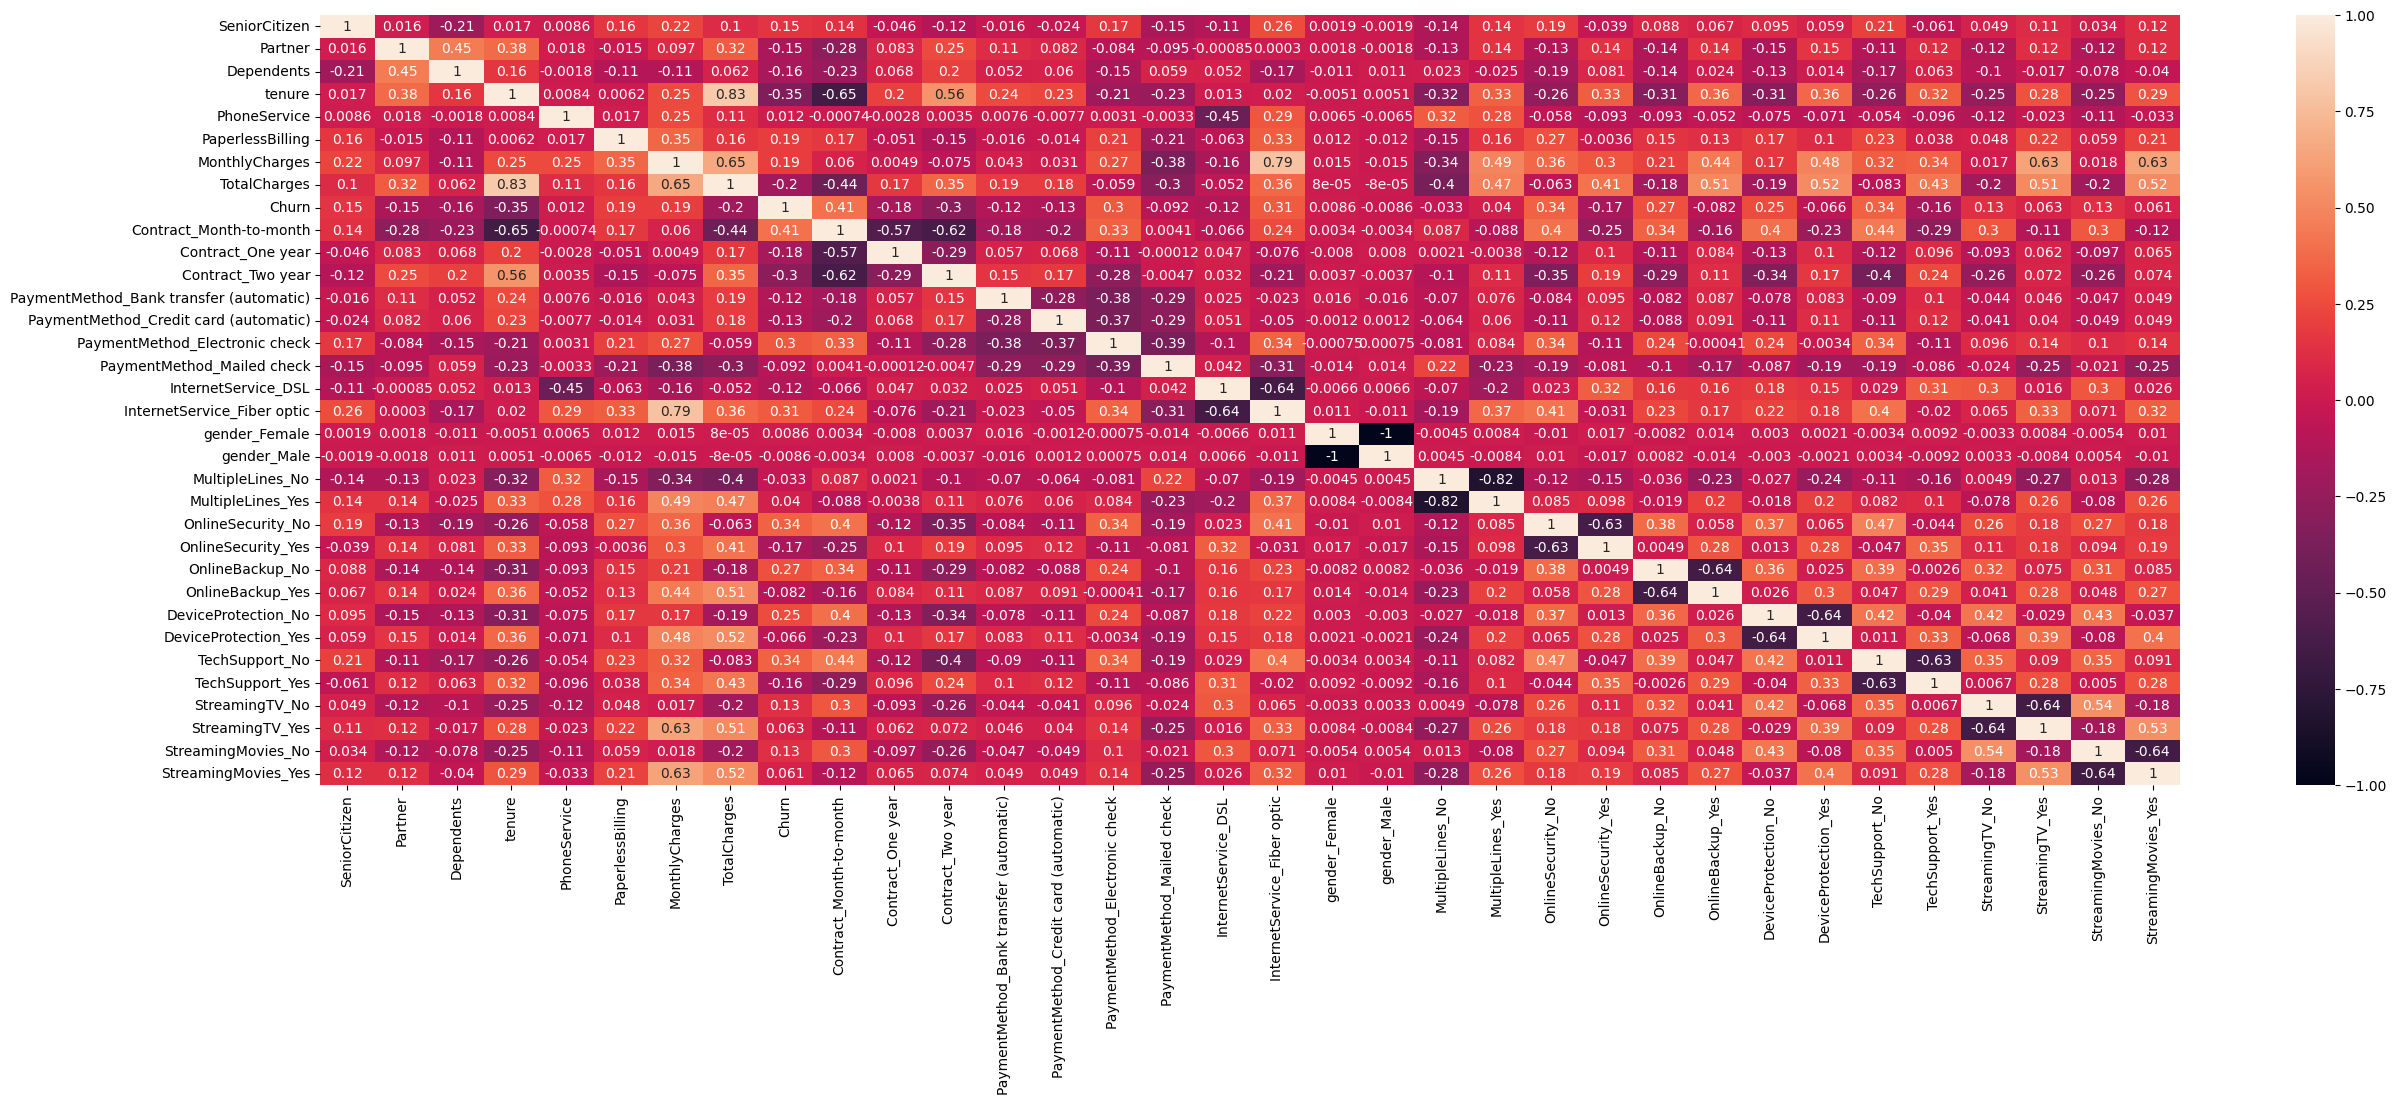

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(telecom.corr(),annot=True)

In [ ]:
#sort by correlation values
#to identify highly correlated attributes
#request feature engineering

In [ ]:
len(telecom['Churn'])

7043

In [ ]:
sum(telecom['Churn'])

1869

In [ ]:
churn_rate=(sum(telecom['Churn'])/len(telecom['Churn']))*100
print(churn_rate)

26.536987079369588


In [ ]:
#dropping interrelated attributes
x_train=x_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)

In [ ]:
x_test=x_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)

<Axes: >

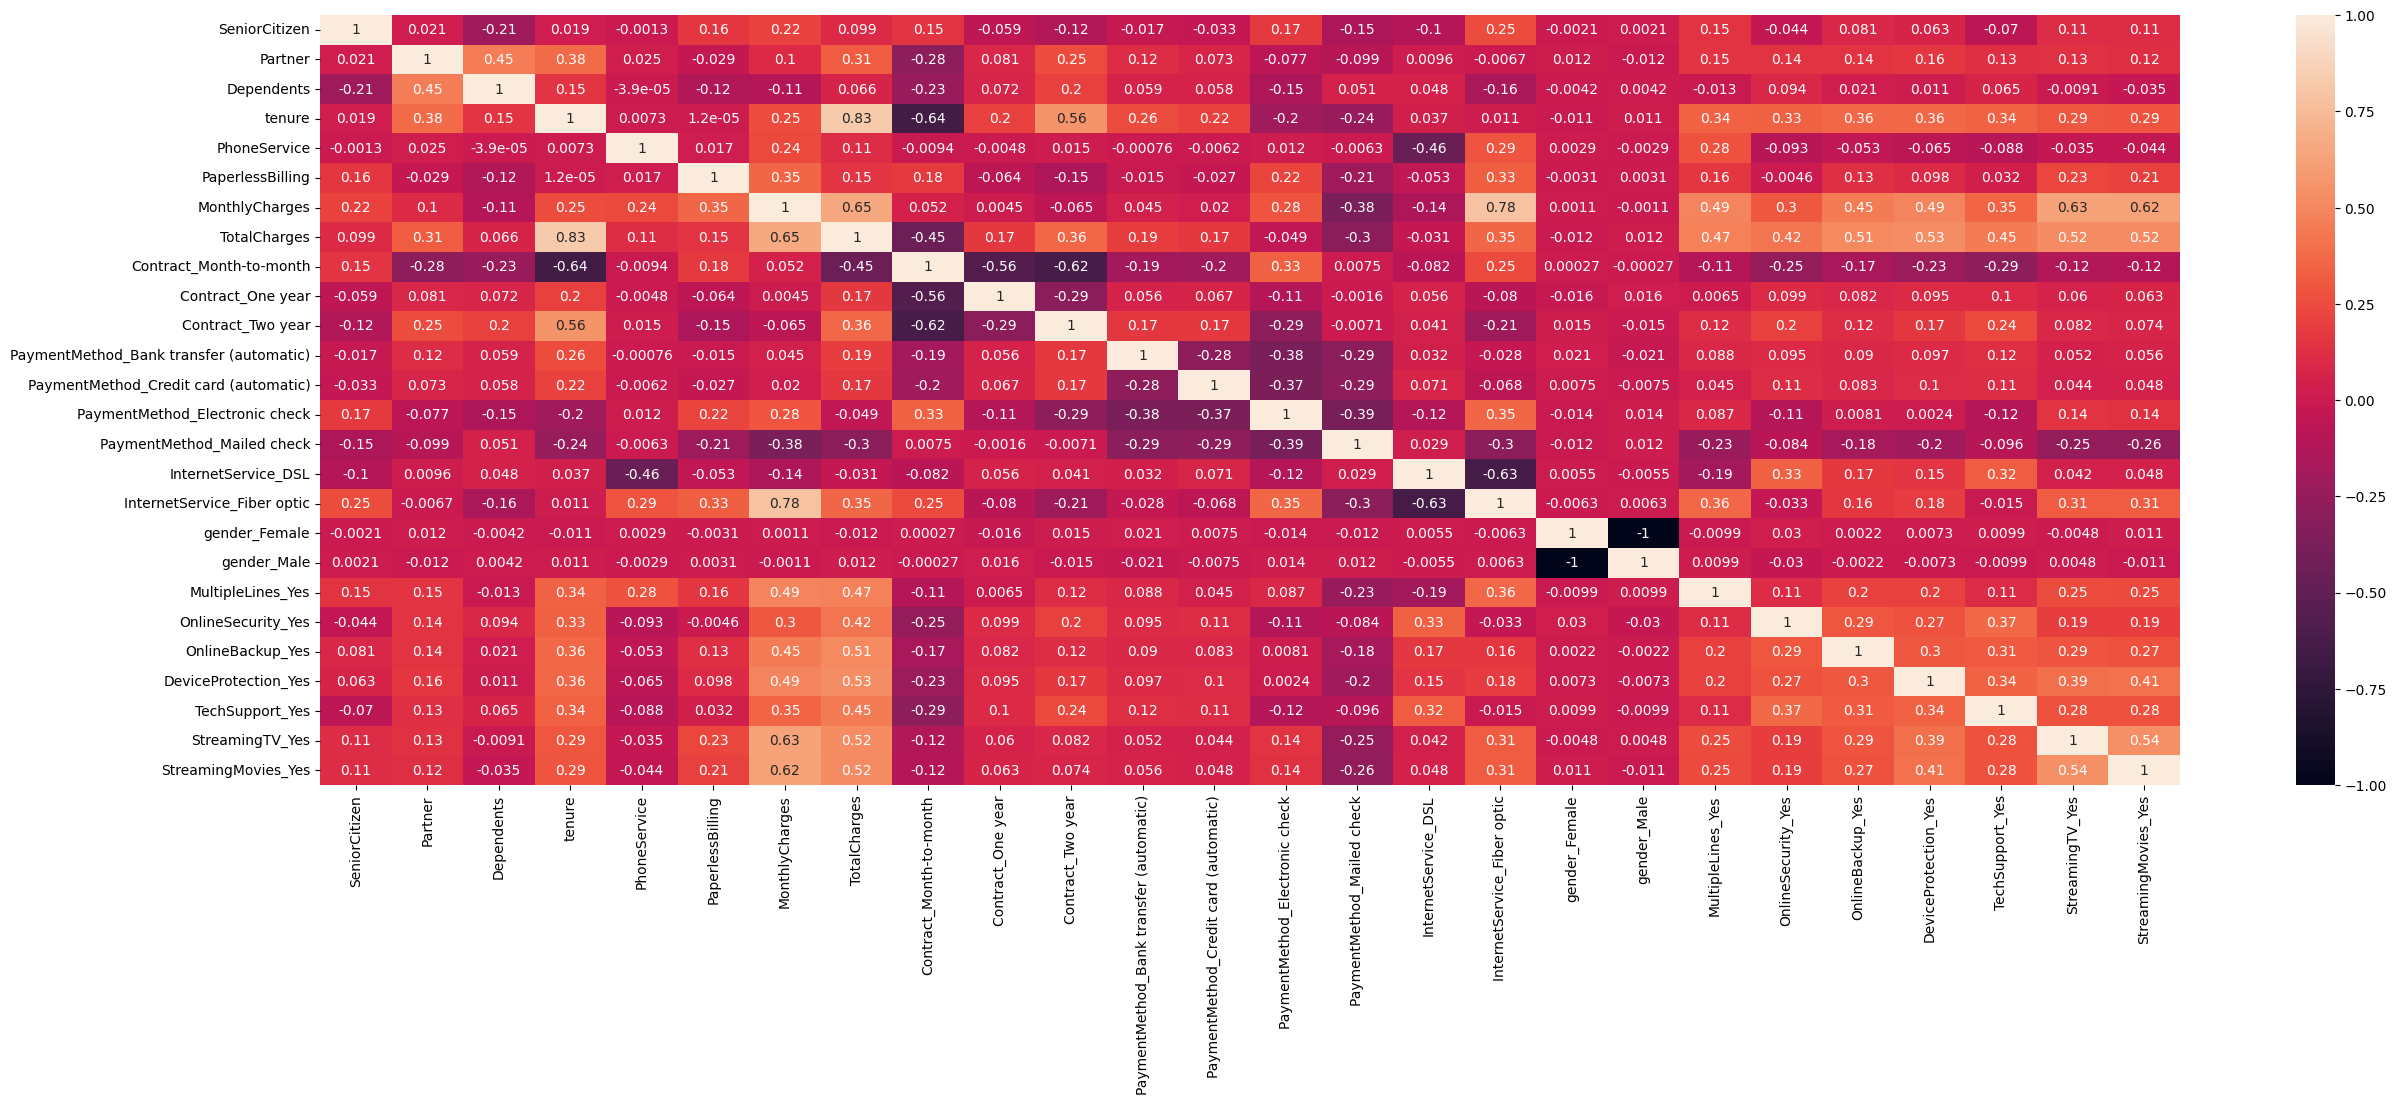

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(x_train.corr(),annot=True)

In [ ]:
telecom1=telecom.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)

<Axes: >

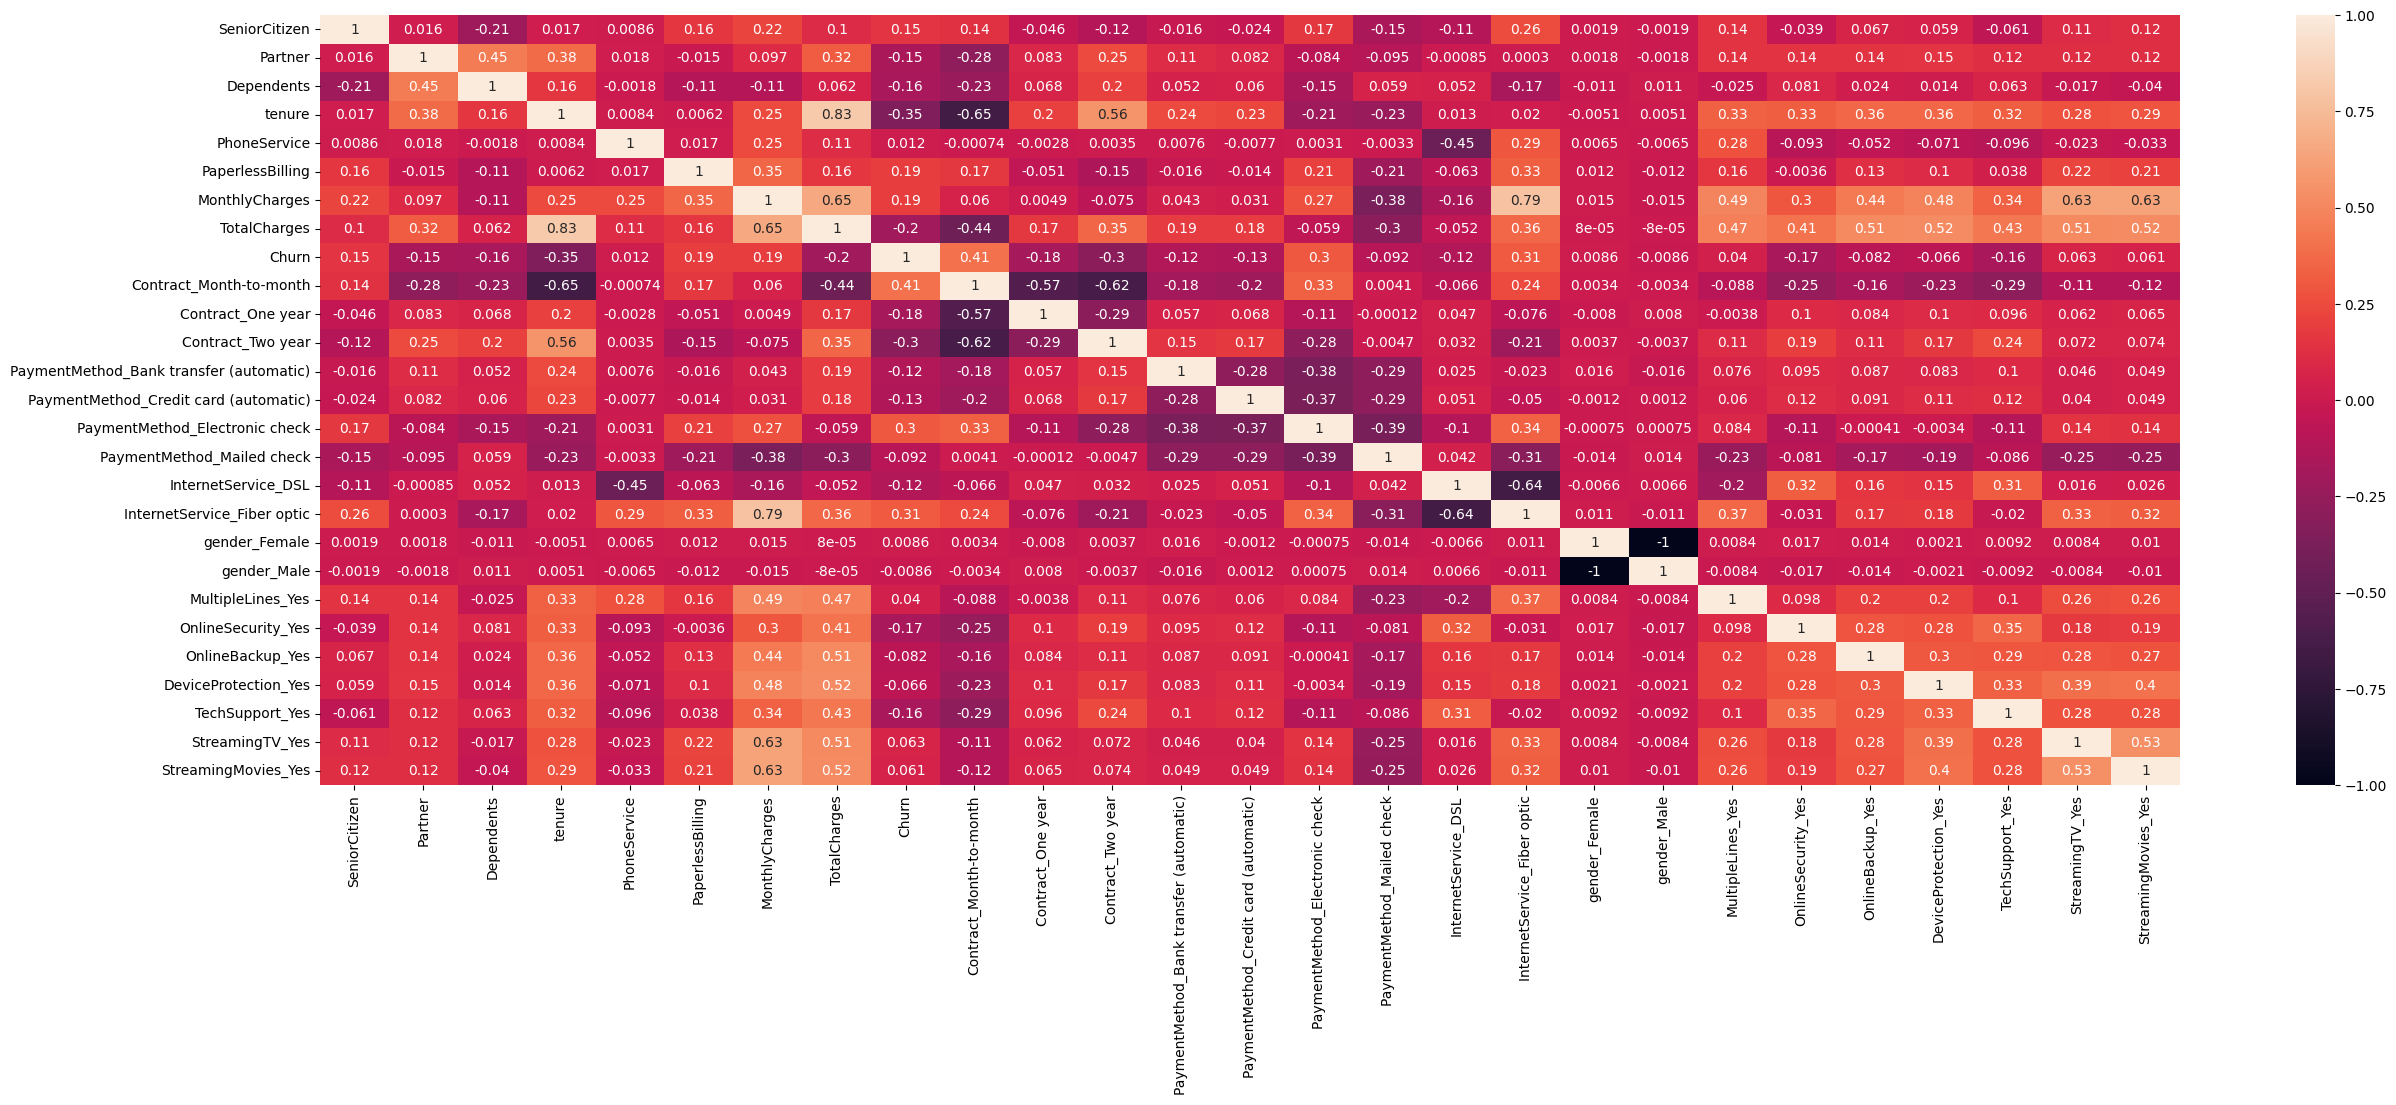

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(telecom1.corr(),annot=True)

In [ ]:
from statsmodels.genmod.families import Binomial
#building the model
#statsmodel.api
import statsmodels.api as sm
logm1=sm.GLM(y_train,sm.add_constant(x_train),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Sun, 02 Apr 2023   Deviance:                       4016.1
Time:                        04:50:11   Pearson chi2:                 5.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2885
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.8090      1.197     -2.347      0.019      -5.154      -0.464
SeniorCitizen                               0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                     0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                                 -0.2207      0.108     -2.049      0.040      -0.432      -0.010
tenure                                     -1.3441      0.179     -7.500      0.000      -1.695      -0.993
PhoneService                                0.4097      0.786      0.521      0.602      -1.131       1.950
PaperlessBilling                            0.3453      0.090      3.828      0.000       0.169       0.522
MonthlyCharges                             -1.5336      1.162     -1.320      0.187      -3.812       0.744
TotalCharges                                0.6103      0.190      3.215      0.001       0.238       0.982
Contract_Month-to-month                    -0.2660      0.407     -0.654      0.513      -1.063       0.531
Contract_One year                          -0.9397      0.409     -2.299      0.022      -1.741      -0.139
Contract_Two year                          -1.6032      0.423     -3.788      0.000      -2.433      -0.774
PaymentMethod_Bank transfer (automatic)    -0.7094      0.309     -2.294      0.022      -1.315      -0.103
PaymentMethod_Credit card (automatic)      -0.8625      0.312     -2.762      0.006      -1.474      -0.251
PaymentMethod_Electronic check             -0.4361      0.305     -1.428      0.153      -1.035       0.162
PaymentMethod_Mailed check                 -0.8010      0.310     -2.581      0.010      -1.409      -0.193
InternetService_DSL                         2.1794      0.977      2.231      0.026       0.264       4.094
InternetService_Fiber optic                 4.2015      1.930      2.177      0.029       0.419       7.984
gender_Female                              -1.3839      0.600     -2.308      0.021      -2.559      -0.209
gender_Male                                -1.4250      0.600     -2.377      0.017      -2.600      -0.250
MultipleLines_Yes                           0.5539      0.215      2.577      0.010       0.133       0.975
OnlineSecurity_Yes                         -0.0429      0.217     -0.198      0.843      -0.467       0.382
OnlineBackup_Yes                           -0.0206      0.211     -0.097      0.922      -0.435       0.394
DeviceProtection_Yes                        0.2014      0.213      0.944      0.345      -0.217       0.620
TechSupport_Yes                            -0.2538      0.219     -1.159      0.247      -0.683       0.175
StreamingTV_Yes                             0.7001      0.3

In [ ]:
#logm1 - is without feature selection
#logm2 - with RFE (Recursive feature engineering)
#RFE - efficient feature selection technique

In [ ]:
#model using Scikit learn
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg)
rfe=rfe.fit(x_train,y_train)

In [ ]:
rfe.n_features_

13

In [ ]:
rfe.support_

array([False, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True, False,  True,  True, False,
       False, False,  True,  True, False,  True, False, False])

In [ ]:
rfe.n_features_in_

26

In [ ]:
rfe.feature_names_in_

array(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'gender_Female', 'gender_Male', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype=object)

In [ ]:
rfe.ranking_

array([ 2, 11,  4,  1,  1,  1,  1,  1,  1, 13,  1, 14,  6,  1,  7,  1,  1,
       10, 12,  3,  1,  1,  5,  1,  8,  9])

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('SeniorCitizen', False, 2),
 ('Partner', False, 11),
 ('Dependents', False, 4),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Contract_Month-to-month', True, 1),
 ('Contract_One year', False, 13),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', False, 14),
 ('PaymentMethod_Credit card (automatic)', False, 6),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 7),
 ('InternetService_DSL', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('gender_Female', False, 10),
 ('gender_Male', False, 12),
 ('MultipleLines_Yes', False, 3),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 5),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 8),
 ('StreamingMovies_Yes', False, 9)]

In [ ]:
col_s=x_train.columns[rfe.support_]
col_s

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes'],
      dtype='object')

In [ ]:
col_ns=x_train.columns[~rfe.support_]
col_ns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'Contract_One year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Female', 'gender_Male', 'MultipleLines_Yes',
       'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [ ]:
x_train_sm=sm.add_constant(x_train[col_s])
logm2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm2.fit()

In [ ]:
y_train_pred=res.predict(x_train_sm)
y_train_pred

877     0.045884
5792    0.420159
5334    0.094707
878     0.023943
6578    0.100244
          ...   
79      0.021558
3927    0.224867
5955    0.004190
6936    0.669288
5640    0.689729
Length: 4930, dtype: float64

In [ ]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
877,0,0.045884,877
5792,1,0.420159,5792
5334,1,0.094707,5334
878,0,0.023943,878
6578,0,0.100244,6578


In [ ]:
y_train_pred_final['pred']=y_train_pred_final['Churn_Prob'].apply(lambda x:1 if x>0.5 else 0)
y_train_pred_final

,Churn,Churn_Prob,CustID,pred
877,0,0.045884,877,0
5792,1,0.420159,5792,0
5334,1,0.094707,5334,0
878,0,0.023943,878,0
6578,0,0.100244,6578,0
...,...,...,...,...
79,0,0.021558,79,0
3927,1,0.224867,3927,0
5955,0,0.004190,5955,0
6936,1,0.669288,6936,1


In [ ]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm1.fit()
y_pred=res.predict(x_train_sm)
y_pred=y_pred.apply(lambda x: 1 if x>0.5 else 0)

In [ ]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['pred'])
print(confusion)

[[3248  379]
 [ 562  741]]


In [ ]:
print(metrics.accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['pred'])*100)

80.91277890466532


In [ ]:
#dealing with multicolinearity
#VIF - Variance Inflation Factor
#Variance of one feature / variance of all features
#1/1=1
#5/1=5
#Detecting multicolinearity using VIF
#if VIF=1 - No multicolinearity
#if VIF<=5 - low
#if VIF >5 - high

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=pd.DataFrame()
vif['features']=x_train[col_s].columns
vif

,features
0,tenure
1,PhoneService
2,PaperlessBilling
3,MonthlyCharges
4,TotalCharges
5,Contract_Month-to-month
6,Contract_Two year
7,PaymentMethod_Electronic check
8,InternetService_DSL
9,InternetService_Fiber optic


In [ ]:
vif['VIF1']=[variance_inflation_factor(x_train[col_s].values,i) for i in range(x_train[col_s].shape[1])]

In [ ]:
vif

,features,VIF1
0,tenure,6.797763
1,PhoneService,6.290835
2,PaperlessBilling,2.904293
3,MonthlyCharges,6.255665
4,TotalCharges,10.253144
5,Contract_Month-to-month,5.180663
6,Contract_Two year,2.358592
7,PaymentMethod_Electronic check,1.951180
8,InternetService_DSL,3.941265
9,InternetService_Fiber optic,10.557264


In [ ]:
vif['VIF1']=round(vif['VIF1'],0)

In [ ]:
vif

,features,VIF1
0,tenure,7.0
1,PhoneService,6.0
2,PaperlessBilling,3.0
3,MonthlyCharges,6.0
4,TotalCharges,10.0
5,Contract_Month-to-month,5.0
6,Contract_Two year,2.0
7,PaymentMethod_Electronic check,2.0
8,InternetService_DSL,4.0
9,InternetService_Fiber optic,11.0


In [ ]:
#col1,col2,col3 - total features
#col1 - against all - index of - x_train[cols_s] -- for loop
#col2 - against all
#col3 - against all

In [ ]:
vif.sort_values(by="VIF1",ascending=False)

,features,VIF1
9,InternetService_Fiber optic,11.0
4,TotalCharges,10.0
0,tenure,7.0
1,PhoneService,6.0
3,MonthlyCharges,6.0
5,Contract_Month-to-month,5.0
8,InternetService_DSL,4.0
2,PaperlessBilling,3.0
6,Contract_Two year,2.0
7,PaymentMethod_Electronic check,2.0


In [ ]:
col_s=col_s.drop('InternetService_Fiber optic',1)

In [ ]:
#create logm3 model
x_train_sm=sm.add_constant(x_train[col_s])
logm3=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm3.fit()
y_train_pred=res.predict(x_train_sm)
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final['pred']=y_train_pred_final['Churn_Prob'].apply(lambda x:1 if x>0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['pred'])*100)

80.81135902636916


In [ ]:
#Compute VIF again
vif=pd.DataFrame()
vif['features']=x_train[col_s].columns
vif['VIF1']=[variance_inflation_factor(x_train[col_s].values,i) for i in range(x_train[col_s].shape[1])]
vif['VIF1']=round(vif['VIF1'],0)
vif.sort_values(by="VIF1",ascending=False)

,features,VIF1
4,TotalCharges,10.0
0,tenure,7.0
1,PhoneService,5.0
3,MonthlyCharges,4.0
5,Contract_Month-to-month,4.0
2,PaperlessBilling,3.0
6,Contract_Two year,2.0
7,PaymentMethod_Electronic check,2.0
8,InternetService_DSL,2.0
9,OnlineSecurity_Yes,2.0


In [ ]:
col_s=col_s.drop('TotalCharges',1)

In [ ]:
#create logm4 model
x_train_sm=sm.add_constant(x_train[col_s])
logm4=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm4.fit()
y_train_pred=res.predict(x_train_sm)
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final['pred']=y_train_pred_final['Churn_Prob'].apply(lambda x:1 if x>0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['pred'])*100)

80.22312373225152


In [ ]:
#Compute VIF again
vif=pd.DataFrame()
vif['features']=x_train[col_s].columns
vif['VIF1']=[variance_inflation_factor(x_train[col_s].values,i) for i in range(x_train[col_s].shape[1])]
vif['VIF1']=round(vif['VIF1'],0)
vif.sort_values(by="VIF1",ascending=False)

,features,VIF1
1,PhoneService,5.0
4,Contract_Month-to-month,4.0
2,PaperlessBilling,3.0
0,tenure,2.0
3,MonthlyCharges,2.0
5,Contract_Two year,2.0
6,PaymentMethod_Electronic check,2.0
7,InternetService_DSL,2.0
8,OnlineSecurity_Yes,2.0
9,OnlineBackup_Yes,2.0


In [ ]:
col_s=col_s.drop('PhoneService',1)

In [ ]:
#create logm5 model
x_train_sm=sm.add_constant(x_train[col_s])
logm5=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm5.fit()
y_train_pred=res.predict(x_train_sm)
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final['pred']=y_train_pred_final['Churn_Prob'].apply(lambda x:1 if x>0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['pred'])*100)

80.38539553752535


In [ ]:
#Compute VIF again
vif=pd.DataFrame()
vif['features']=x_train[col_s].columns
vif['VIF1']=[variance_inflation_factor(x_train[col_s].values,i) for i in range(x_train[col_s].shape[1])]
vif['VIF1']=round(vif['VIF1'],0)
vif.sort_values(by="VIF1",ascending=False)

,features,VIF1
3,Contract_Month-to-month,3.0
0,tenure,2.0
1,PaperlessBilling,2.0
2,MonthlyCharges,2.0
4,Contract_Two year,2.0
5,PaymentMethod_Electronic check,2.0
6,InternetService_DSL,2.0
7,OnlineSecurity_Yes,2.0
8,OnlineBackup_Yes,2.0
9,TechSupport_Yes,2.0


In [ ]:
confusion=metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['pred'])
print(confusion)

[[3258  369]
 [ 598  705]]


In [ ]:
TP=confusion[1,1]
TN=confusion[0,0]
FN=confusion[1,0]
FP=confusion[0,1]

In [ ]:
#another name for recall is true positive rate
precision=TP/(TP+FP)
print(precision)

0.6564245810055865


In [ ]:
recall=TP/(TP+FN)
print(recall)

0.5410590943975442


In [ ]:
#sensitivity and specificity
#recall in other words is called sensitivity
specificity=TN/(TN+FP)
print(specificity)

0.8982630272952854


In [ ]:
#false positive rate
FPR=FP/(TN+FP)
print(FPR)

0.10173697270471464


In [ ]:
TPR=TP/(TP+FN)
print(TPR)

0.5410590943975442


In [ ]:
from sklearn.metrics import precision_score,recall_score
ps=precision_score(y_train_pred_final['Churn'],y_train_pred_final['pred'])
print(ps)

0.6564245810055865


In [ ]:
rs=recall_score(y_train_pred_final['Churn'],y_train_pred_final['pred'])
print(rs)

0.5410590943975442


In [ ]:
from sklearn.metrics import precision_recall_curve
p,r,thresholds=precision_recall_curve(y_train_pred_final['Churn'],y_train_pred_final['pred'])

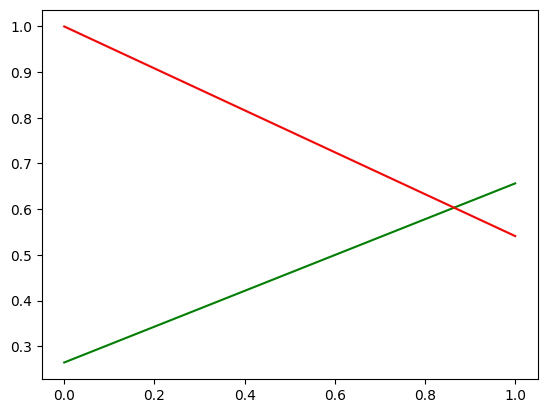

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
#Test the model
x_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(x_test[['tenure','MonthlyCharges','TotalCharges']])
x_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,...,InternetService_Fiber optic,gender_Female,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
4880,0,1,0,0.727547,1,0,-1.498622,-0.530522,0,0,...,0,0,1,0,0,0,0,0,0,0
1541,0,0,0,1.624530,1,0,-1.522082,-0.369292,0,0,...,0,0,1,0,0,0,0,0,0,0
1289,0,0,0,1.257583,1,0,0.118384,0.808641,0,1,...,0,0,1,1,1,1,1,1,0,0
5745,0,1,1,1.176039,1,1,-1.376300,-0.364408,0,0,...,0,1,0,1,0,0,0,0,0,0
4873,0,0,0,-1.025647,1,0,-1.540514,-0.936490,1,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 4880 to 3625
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            2113 non-null   int64  
 1   Partner                                  2113 non-null   int64  
 2   Dependents                               2113 non-null   int64  
 3   tenure                                   2113 non-null   float64
 4   PhoneService                             2113 non-null   int64  
 5   PaperlessBilling                         2113 non-null   int64  
 6   MonthlyCharges                           2113 non-null   float64
 7   TotalCharges                             2113 non-null   float64
 8   Contract_Month-to-month                  2113 non-null   uint8  
 9   Contract_One year                        2113 non-null   uint8  
 10  Contract_Two year                        2113

In [ ]:
x_test=x_test[col_s]
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 4880 to 3625
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          2113 non-null   float64
 1   PaperlessBilling                2113 non-null   int64  
 2   MonthlyCharges                  2113 non-null   float64
 3   Contract_Month-to-month         2113 non-null   uint8  
 4   Contract_Two year               2113 non-null   uint8  
 5   PaymentMethod_Electronic check  2113 non-null   uint8  
 6   InternetService_DSL             2113 non-null   uint8  
 7   OnlineSecurity_Yes              2113 non-null   uint8  
 8   OnlineBackup_Yes                2113 non-null   uint8  
 9   TechSupport_Yes                 2113 non-null   uint8  
dtypes: float64(2), int64(1), uint8(7)
memory usage: 80.5 KB


In [ ]:
x_test_sm=sm.add_constant(x_test)

In [ ]:
x_test_sm.head()

,const,tenure,PaperlessBilling,MonthlyCharges,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes
4880,1.0,0.727547,0,-1.498622,0,1,0,0,0,0,0
1541,1.0,1.624530,0,-1.522082,0,1,0,0,0,0,0
1289,1.0,1.257583,0,0.118384,0,0,0,1,1,1,1
5745,1.0,1.176039,1,-1.376300,0,1,0,0,0,0,0
4873,1.0,-1.025647,0,-1.540514,1,0,0,0,0,0,0


In [ ]:
y_test_pred=res.predict(x_test_sm)

In [ ]:
y_test_pred

4880    0.010657
1541    0.005377
1289    0.017708
5745    0.012896
4873    0.153058
          ...   
1285    0.777130
5092    0.157580
5837    0.427811
3597    0.442455
3625    0.005542
Length: 2113, dtype: float64

In [ ]:
y_test_pred_final=pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
#y_test_pred_final['CustID']=y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob
4880,0,0.010657
1541,0,0.005377
1289,0,0.017708
5745,0,0.012896
4873,0,0.153058


In [ ]:
y_test_pred_final['pred']=y_test_pred_final['Churn_Prob'].apply(lambda x:1 if x>0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,pred
4880,0,0.010657,0
1541,0,0.005377,0
1289,0,0.017708,0
5745,0,0.012896,0
4873,0,0.153058,0


In [ ]:
print(metrics.accuracy_score(y_test_pred_final['Churn'],y_test_pred_final['pred'])*100)

78.37198296261239


In [ ]:
#Storing the API on disk
#Pickle is a tool that provides serialization and deserialization of data
import pickle
#Create a pickle file on drive
LR_model='/content/drive/MyDrive/PGP Datasets/logRmodel.pkl' #creates empty file
LR_pkl=open(LR_model,'wb') #opens the file for writing - w: write mode, b: binary
pickle.dump(res,LR_pkl)
LR_pkl.close()

In [ ]:
Readmodel=open(LR_model,'rb') #r: read, b: binary
tmp=pickle.load(Readmodel)
tmp

In [ ]:
y_test_pred=tmp.predict(x_test_sm)
y_test_pred

4880    0.010657
1541    0.005377
1289    0.017708
5745    0.012896
4873    0.153058
          ...   
1285    0.777130
5092    0.157580
5837    0.427811
3597    0.442455
3625    0.005542
Length: 2113, dtype: float64